In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin         # minimum-fitting of functions
import scipy.stats as stats
%matplotlib inline

# Bayes Statistik II

# Exakte mathematische Behandlung

... am Beispiel dichotomer Daten

- Bernoulli-Experiment
- Bayes Schlußfolgerung
- Konjugierte Verteilung des Priors
- Beta-Verteilung
    - Eigenschaften
    - Beispiele
    - Schlußfolgerungen
- Geschlossene Lösung
- Interpretation der Ergebnisse
    - Prior als Vorwissen
    - Posterior
    - Grenzen des Modells
- Zusammenfassung, Probleme und Ausblick

# Münzwurf 

steht stellvertretend für alle Bernoulli-Experimente: 
- Sozialwissenschaften: Umfrage ja/nein
- Biologie: Merkmal vorhanden/nicht vorhanden, Mädchengeburten
- Physik: Spin up/down
- Psychophysik: Reiz gesehen/nicht gesehen
- Medizin: Behandlung wirkt/wirkt nicht

### Eigenschaften:

- genau 2 Möglichkeiten
- schließen sich gegensätzlich aus
- benötigen keine Metrik ("größer", "Abstand")
- interessierende Größe: jeweilige Häufigkeit
    - Parameter $\theta$

## Bernoulli-Verteilung
#### Modell:
Münze habe Wahrscheinlichkeit 

$\begin{aligned}
\theta \quad & \text{für Ergebnis "Kopf"} & y=1 \\
1-\theta \quad & \text{für Ergebnis "Zahl"} & y=0
\end{aligned}$

Mathematische Schreibweise
$$p(y|\theta) = \theta^{y}\cdot (1-\theta)^{1-y}$$

## mehrere Würfe
- i.i.d
- $N$ Wiederholungen
- $z$ mal Kopf

$$p(y_i|\theta) = \theta^{y_i}\cdot (1-\theta)^{1-y_i}$$

Für ein erhaltenes Ereignis $\mathbf{y}=(y_1, y_2, \dots , y_N)^T$ unabhängiger Einzelereignisse $y_i$ multiplizieren sich die Wahrscheinlichkeiten

$$\begin{aligned}
p(\mathbf{y}|\theta) &= \prod_{i=1}^{N}p(y_i|\theta) \\
 &= \prod_{i=1}^{N}\theta^{\,y_i}(1-\theta)^{(1-y_i)} \\
 &= \theta^{\sum_i y_i}(1-\theta)^{\sum_i(1-y_i)} \\
 &= \theta^{\,z}(1-\theta)^{N-z}
\end{aligned}$$

# Beispiel Münzen

## 1) 11 diskrete Münzen

11 Münzen mit unterschiedlicher Wahrscheinlichkeit für *Kopf*:
$$\theta_i\in[0.0, \,0.1, \dots 1.0]$$

Wir haben eine Münze davon, wissen nicht welche

In [3]:
'''coins'''
Theta = np.linspace(0.0, 1.0, 11) # possible parameters of coins

'''prior distribution'''
pTheta = np.asarray([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0]) # e.g. a triangle
pTheta = pTheta/pTheta.sum() # normalized 

### Experiment

Münzwurf. Ergebnis: *Kopf* $\;y_1=1$

In [4]:
'''data gives likelihood and evidence'''
z = 1     # we obtained a head
N = 1     # we tossed only once
# likelihood from Bernoulli model
pDataGivenTheta = Theta**z * (1-Theta)**(N-z)
# evidence over all
pData = (pDataGivenTheta * pTheta).sum()
_original = np.get_printoptions() #  (trick to save print options)
# 2 precission digits
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print('thetas      {}'.format(Theta))
print('probability {}'.format(pTheta))
print('data        {} of {}'.format(z, N))
print('likelihood  {}'.format(pDataGivenTheta))  
print('evidence    {}'.format(pData))
np.set_printoptions(**_original) # (restore print options)

thetas      [ 0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00]
probability [ 0.00  0.04  0.08  0.12  0.16  0.20  0.16  0.12  0.08  0.04  0.00]
data        1 of 1
likelihood  [ 0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00]
evidence    0.5


### Ergebnis Posterior

In [5]:
'''posterior by applied Bayesian rule'''
pThetaGivenData = pDataGivenTheta * pTheta / pData # this is Bayes rule now
np.set_printoptions(formatter={'float': '{: 0.2f}'.format}) # 2 precission digits
print('thetas      {}'.format(Theta))  
print('-------------------------------------------------------------------------------')
print('prior       {}'.format(pTheta))
print('likelihood  {}'.format(pDataGivenTheta))  
print('-------------------------------------------------------------------------------')
print('posterior   {}'.format(pThetaGivenData))
np.set_printoptions(**_original)            # (restore print options)

thetas      [ 0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00]
-------------------------------------------------------------------------------
prior       [ 0.00  0.04  0.08  0.12  0.16  0.20  0.16  0.12  0.08  0.04  0.00]
likelihood  [ 0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00]
-------------------------------------------------------------------------------
posterior   [ 0.00  0.01  0.03  0.07  0.13  0.20  0.19  0.17  0.13  0.07  0.00]


prior     [ 0.00  0.04  0.08  0.12  0.16  0.20  0.16  0.12  0.08  0.04  0.00]
posterior [ 0.00  0.01  0.03  0.07  0.13  0.20  0.19  0.17  0.13  0.07  0.00]


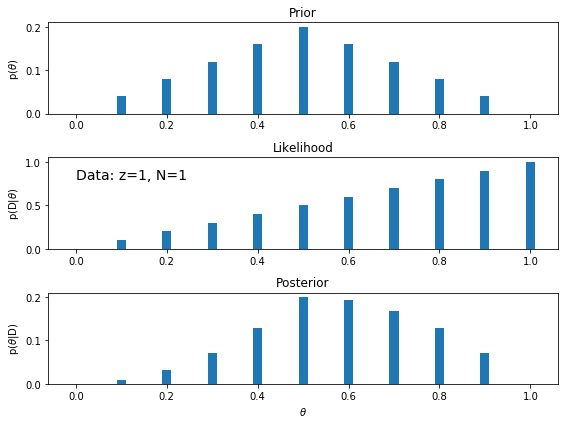

In [6]:
'''show result of Bayes reasoning for one single experiment'''
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(3, 1, 1)                       # 3 plots one under another
plt.bar(Theta, pTheta, width=.02)              # --- Prior --- 
plt.title('Prior')
plt.ylabel('p($\\theta$)')
fig.add_subplot(3, 1, 2)
plt.bar(Theta, pDataGivenTheta, width=.02)     # --- Likelihood ---
plt.title('Likelihood')
plt.ylabel('p(D|$\\theta$)')
plt.text(.0, .8, 'Data: z=1, N=1', fontsize=14)
fig.add_subplot(3, 1, 3)
plt.bar(Theta, pThetaGivenData, width=.02)     # --- Posterior ---
plt.title('Posterior')
plt.ylabel('p($\\theta$|D)')
plt.xlabel('$\\theta$')
plt.tight_layout();
_original = np.get_printoptions()              # save print options
# 2 precission digits
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print('prior     {}'.format(pTheta))  
print('posterior {}'.format(pThetaGivenData))
np.set_printoptions(**_original)               # restore print options

## 2) Kontinuierliche (quasi; Gitter-) Auswahl an Münzen

In [10]:
'''quasi continuous selection of coins - can't do continuous on computers...'''
nn = 1000                # 1000 values in interval 0..1 have density 0.001
# possible parameters of coins, pseudo continuous: fine grid
Theta = np.linspace(0.0, 1.0, nn+1)

'''prior distribution'''
pTheta = np.linspace(0, nn, nn+1) # as a starter: ramp up linearly   
pTheta[500:] = pTheta[500::-1]    # second half:  ramp down linearly
pTheta *= nn/pTheta.sum() # probability density at each grid point with dx=.001

In [11]:
# integral square approx. with dx=.001
print('integral of pTheta = {:.5f}'.format(pTheta.sum()/nn))

integral of pTheta = 1.00000


In [12]:
'''data gives likelihood and evidence'''
N = 1     # one toss
z = 1     # we obtained a head (=100%)
pDataGivenTheta = Theta**z * (1-Theta)**(N-z) # likelihood from model   
pData = (pDataGivenTheta * pTheta).mean() # evidence integrated over all

In [13]:
'''posterior by applied Bayesian rule'''
pThetaGivenData = pDataGivenTheta * pTheta / pData # Bayes rule

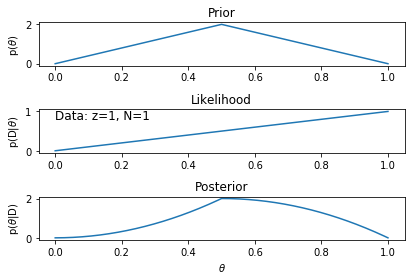

In [15]:
'''show result of Bayes reasoning for one single experiment, outcome head =1,
   continuos distribution of thetas with probability density'''
# fig = plt.figure(figsize=(6, 6))
fig = plt.figure()
fig.add_subplot(3, 1, 1)                       # 3 plots, leftmost
plt.plot(Theta, pTheta)                        # --- Prior --- 
plt.title('Prior')
plt.ylabel('p($\\theta$)')
fig.add_subplot(3, 1, 2)                       # middle of 3 plots
plt.plot(Theta, pDataGivenTheta)               # --- Likelihood ---
plt.title('Likelihood')
plt.ylabel('p(D|$\\theta$)')
plt.text(.0, .8, 'Data: z=1, N=1', fontsize=12)
fig.add_subplot(3, 1, 3)                       # rightmost of 3 plots 
plt.plot(Theta, pThetaGivenData)               # --- Posterior ---
plt.title('Posterior')
plt.ylabel('p($\\theta$|D)')
plt.xlabel('$\\theta$')
plt.tight_layout();

Je mehr die z ist, desto enger die Verteilung ist.

Je mehr Moeglichkeiten gibt,

auf die Post



## Einfluß des Stichprobenumfangs

In [12]:
'''two different sample sizes: data gives likelihood and evidence'''
N1 = 4                                              # *low* number of tosses
z1 = 1                                              # we obtained 25% heads
pDataGivenTheta1 = Theta**z1 * (1-Theta)**(N1-z1)   # likelihood from model with data 
pData1 = (pDataGivenTheta1 * pTheta).mean()         # evidence over all 
N2 = 40                                             # *high* number of tosses
z2 = 10                                             # we obtained 25% heads, here too
pDataGivenTheta2 = Theta**z2 * (1-Theta)**(N2-z2)   # likelihood from model data  
pData2 = (pDataGivenTheta2 * pTheta).mean()         # evidence over all 

In [13]:
'''posterior by applied Bayesian rule'''
pThetaGivenData1 = pDataGivenTheta1 * pTheta / pData1   # Bayes rule for N=4 case
pThetaGivenData2 = pDataGivenTheta2 * pTheta / pData2   # Bayes rule for N=40 case

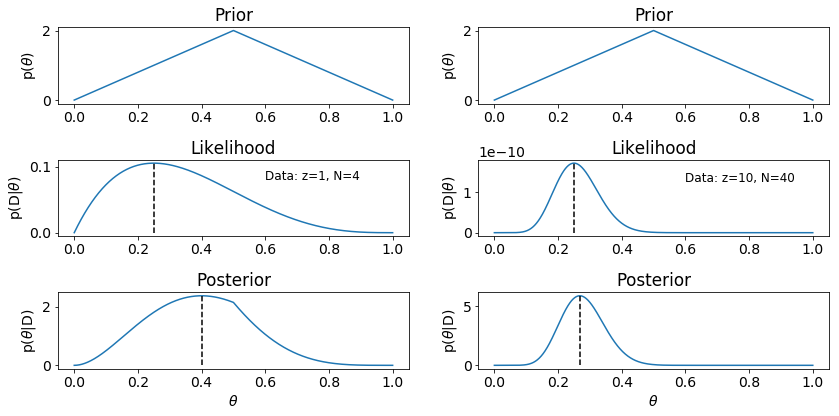

In [14]:
'''show result of Bayes reasoning for different sample sizes'''
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(3, 2, 1)                           # 3 plots --- z=1 N=4 ---
plt.plot(Theta, pTheta)                            # --- Prior --- 
plt.title('Prior')
plt.ylabel('p($\\theta$)')
fig.add_subplot(3, 2, 3)
plt.plot(Theta, pDataGivenTheta1)                  # --- Likelihood ---
plt.plot(2*[Theta[np.argmax(pDataGivenTheta1)]], [0, pDataGivenTheta1.max()], 'k--')
plt.title('Likelihood')
plt.ylabel('p(D|$\\theta$)')
plt.text(.6, .08, 'Data: z=1, N=4', fontsize=12)
fig.add_subplot(3, 2, 5)
plt.plot(Theta, pThetaGivenData1)                  # --- Posterior ---
plt.plot(2*[Theta[np.argmax(pThetaGivenData1)]], [0, pThetaGivenData1.max()], 'k--')
plt.title('Posterior')
plt.ylabel('p($\\theta$|D)')
plt.xlabel('$\\theta$')
fig.add_subplot(3, 2, 2)                           # 3 plots --- z=10 N=40 ---
plt.plot(Theta, pTheta)                            # --- Prior ----
plt.title('Prior')
plt.ylabel('p($\\theta$)')
fig.add_subplot(3, 2, 4)
plt.plot(Theta, pDataGivenTheta2)                  # --- Likelihood ---
plt.title('Likelihood')
plt.ylabel('p(D|$\\theta$)')
plt.text(.6, 1.25E-10, 'Data: z=10, N=40', fontsize=12)
plt.plot(2*[Theta[np.argmax(pDataGivenTheta2)]], [0, pDataGivenTheta2.max()], 'k--')
fig.add_subplot(3, 2, 6)
plt.plot(Theta, pThetaGivenData2)                  # --- Posterior ---
plt.plot(2*[Theta[np.argmax(pThetaGivenData2)]], [0, pThetaGivenData2.max()], 'k--')
plt.title('Posterior')
plt.ylabel('p($\\theta$|D)')
plt.xlabel('$\\theta$')
plt.tight_layout();

Wenn es scharfe ist, such Posterior ein zwischen Werte zwischen Prior und Likelihood.



In [15]:
print('Max Likelihood at theta = {:.3f} and {:.3f}'
      .format(Theta[np.argmax(pDataGivenTheta1)], Theta[np.argmax(pDataGivenTheta2)]))
print('Max Posterior  at theta = {:.3f} and {:.3f}'
      .format(Theta[np.argmax(pThetaGivenData1)], Theta[np.argmax(pThetaGivenData2)]))

Max Likelihood at theta = 0.250 and 0.250
Max Posterior  at theta = 0.400 and 0.268


## Einfluß des Priors

In [16]:
'''two different prior distributions: sharp and flat'''
pTheta1 = pTheta**.1                # flatten distribution
pTheta1 /= pTheta1.mean()           # make it a density by normalizing
pTheta2 = pTheta**10                # sharpen distribution
pTheta2 /= pTheta2.mean()           # make it a density by normalizing

In [17]:
'''data gives likelihood and evidence'''
N = 40     # tosses
z = 10     # we obtained 25% heads
pDataGivenTheta = Theta**z * (1-Theta)**(N-z)               # (same) likelihood from model   
pData1 = (pDataGivenTheta * pTheta1).mean()                 # evidence over all if flat
pData2 = (pDataGivenTheta * pTheta2).mean()                 # evidence over all if sharp
'''posterior by applied Bayesian rule'''
pThetaGivenData1 = pDataGivenTheta * pTheta1 / pData1       # Bayes rule
pThetaGivenData2 = pDataGivenTheta * pTheta2 / pData2       # Bayes rule

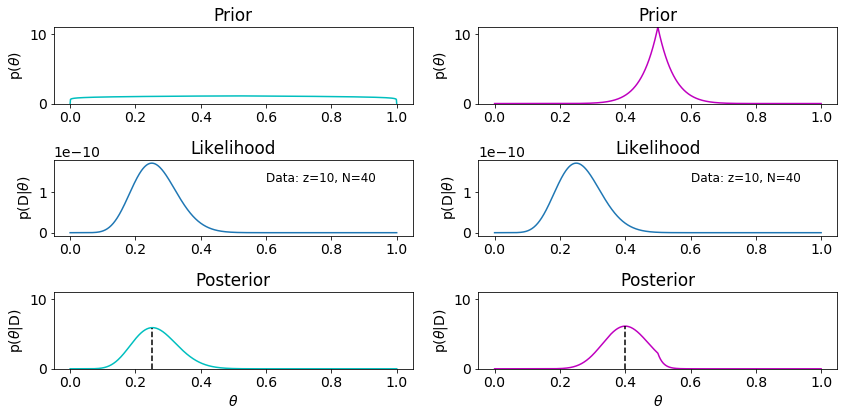

In [18]:
'''show result of Bayes reasoning for different priors'''
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(3, 2, 1)                           # 3 plots --- flat ---
plt.plot(Theta, pTheta1, 'c-')                     # --- Prior --- 
plt.title('Prior')
plt.ylabel('p($\\theta$)')
plt.ylim((0, 11))
fig.add_subplot(3, 2, 3)
plt.plot(Theta, pDataGivenTheta)                   # --- Likelihood ---
plt.title('Likelihood')
plt.ylabel('p(D|$\\theta$)')
plt.text(.6, 1.25E-10, 'Data: z=10, N=40', fontsize=12)
fig.add_subplot(3, 2, 5)
plt.plot(Theta, pThetaGivenData1, 'c-')            # --- Posterior ---
plt.plot(2*[Theta[np.argmax(pThetaGivenData1)]], [0, pThetaGivenData1.max()], 'k--')
plt.title('Posterior')
plt.ylabel('p($\\theta$|D)')
plt.xlabel('$\\theta$')
plt.ylim((0, 11))
fig.add_subplot(3, 2, 2)                           # 3 plots --- sharp ---
plt.plot(Theta, pTheta2, 'm-')                     # --- Prior --- 
plt.title('Prior')
plt.ylabel('p($\\theta$)')
plt.ylim((0, 11))
fig.add_subplot(3, 2, 4)
plt.plot(Theta, pDataGivenTheta)                   # --- Likelihood ---
plt.title('Likelihood')
plt.ylabel('p(D|$\\theta$)')
plt.text(.6, 1.25E-10, 'Data: z=10, N=40', fontsize=12)
fig.add_subplot(3, 2, 6)
plt.plot(Theta, pThetaGivenData2, 'm-')            # --- Posterior ---
plt.plot(2*[Theta[np.argmax(pThetaGivenData2)]], [0, pThetaGivenData2.max()], 'k--')
plt.title('Posterior')
plt.ylabel('p($\\theta$|D)')
plt.xlabel('$\\theta$')
plt.ylim((0, 11))
plt.tight_layout();

## Zwischen-Zusammenfassung

Bayes'sches Schlußfolgern: Prior & Daten $\Rightarrow$ Posterior

- Prior
    - Vorwissen über den Parameter
    - je schärfer/besser das Vorwissen desto größer sein Einfluß
    - Ausschließen von Möglichkeiten durch Nullsetzen
- Likelihood
    - Daten aus Versuchen *unter der Annahme* eines Parameters
    - je mehr Daten/schärfere Likelihood, desto größer deren Einfluß
- Posterior
    - Neujustierung der Erkenntnis über die Verteilung des Parameters
    - damit über Punktschätzer, Intervallschätzer, ...
    - Kreislauf möglich (Unabhängigkeit der Reihenfolge)

# Fragen?

# Theoretische Verteilung 
#### des Parameters $\theta$
- $p(D|\theta)$
- <span style="color:blue">$p(\theta)$</span>
- <span style="color:blue">$p(\theta|D)$</span>

$$
likelihood = \theta^{z}*(1-\theta)^{N-z}
$$

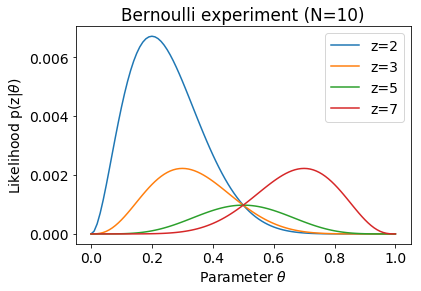

In [19]:
'''Likelihood = Probability p(D|theta) for one data vector of N Bernoulli experiments
   input z:  number of observed "heads"
         N:  number of experiments
         t:  single probability theta
   output p: probability of vector with z successes under N trials with prob. theta
   !         does not sum up to 1 - unlike binomial distribution '''
def BernoulliLikelihood(theta, N, z):
    return theta**z * (1-theta)**(N-z)

N = 10                                      # experiment: number of tosses
z = 3                                       # data result: 3 heads
thetas = np.linspace(0., 1., 101)           # some possible probabilities, quasi contin.
plt.plot(thetas, BernoulliLikelihood(thetas, N, 2), label='z={}'.format(2))
plt.plot(thetas, BernoulliLikelihood(thetas, N, z), label='z={}'.format(z))
plt.plot(thetas, BernoulliLikelihood(thetas, N, 5), label='z={}'.format(5))
plt.plot(thetas, BernoulliLikelihood(thetas, N, 7), label='z={}'.format(7))
plt.title('Bernoulli experiment (N={})'.format(N))
plt.xlabel('Parameter $\\theta$')
plt.ylabel('Likelihood p(z|$\\theta$)')
plt.legend(loc='upper right');

Weil es fair Muenz ist, deshalb bleiben es in .5.

Norminalverteilung s

Liklihood ist keine Wahrlichkeitverteilung.

#### Bernoulli-Likelihood:

$$p(z|\theta) = \theta^{z}\cdot (1-\theta)^{1-z}$$

## Modell für Parameter

- Bereich $\theta\in[0, 1]$
- Ziel: vor und nach Anwendung der Bayes Schlußfolgerung sollte ähnliche Form von Formel herauskommen
    - "conjugate prior"
- $\Rightarrow$ Potenzen von $\theta$ und $(1-\theta)$

## Beta-Verteilung
$$p(\theta|a,b) = \text{beta}(\theta|a,b) = \theta^{\,a-1} (1-\theta)^{b-1} / B(a,b)$$
mit Normierungsfaktor *Beta-Funktion* $B$
$$B(a,b) = \int_{0}^{1}\theta^{\,a-1} (1-\theta)^{b-1} \,\mathrm{d}\theta$$

- $a, b \in \mathbb{R} > 0$

### Beispiele für verschiedene Faktoren a und b
Beta-Verteilung ist in ``Python stats`` vordefiniert

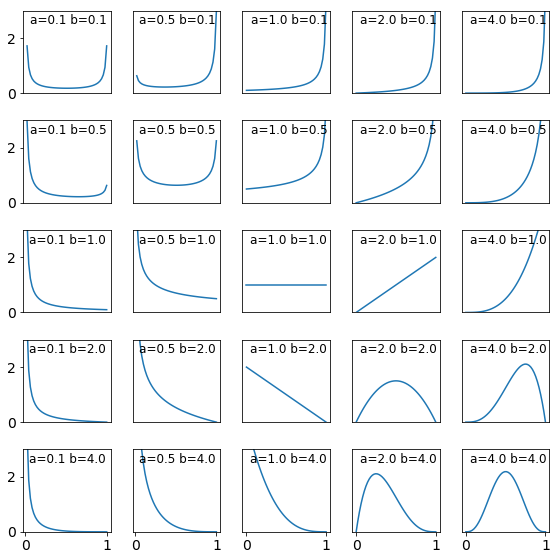

In [21]:
'''table of beta probability density distributions for a,b from .1 to 4
   x-axis: theta
   y-axis: p(theta) = beta(theta, a, b)
'''
ab = np.asarray([.1, .5, 1., 2., 4.])        # selected values for a and b within grid
theta = np.linspace(0., 1.)                  # range of parameter theta
f = plt.figure(figsize=(8, 8))               # plot area for 5x5 subplots in grid 
for i, a in enumerate(ab):                   # cycle through columns
    for j, b in enumerate(ab):               # cycle through rows
        f.add_subplot(len(ab), len(ab), len(ab)*j+i+1)   # subplot's linear number scheme
        plt.plot(theta, stats.beta(a, b).pdf(theta))     # beta(theta) distribution
        plt.ylim(0., 3.0)                                # make same height for comparison
        if j!=len(ab)-1:                                 # only last row: with x tick numbers
            plt.gca().get_xaxis().set_visible(False)
        if i>0:                                          # only 1st of row: with y tick numbers
            plt.gca().get_yaxis().set_visible(False)
        plt.text(0.05, 2.5, 'a={} b={}'.format(a, b), fontsize=12)
plt.tight_layout();

(2,2) -> (4,4) es iwrd spitzer.

(1,1) ist ganz flach

anti-fair


## Prior
Aus obiger Tabelle gewünschte Vorauswahl für $\theta$ aussuchen

#### Beispielsweise
- (4, 4) für relativ faire Münze
- (0.1, 2) für Zahl-lastige Münze
- (1, 1) komplettes *nicht*-Wissen
- (0.5, 0.5) wenn Ränder wahrscheinlicher als fair sind: Münze aus dem Zauberladen

# Eigenschaften der Beta-Verteilung

#### Erwartungswert
$$\mu = \frac{a}{a+b}$$
#### Modus
nur möglich für $a>1$ und $b>1$
$$\omega=\frac{a-1}{a+b-2}$$
#### Streuung
nur sinnvoll für $a>1$ und $b>1$
$$\sigma = \sqrt{\mu(1-\mu)/(a+b+1)}$$


## Festlegen eines Priors gemäß Vorwissen

#### Beispielsweise aus $\mu$ und $\sigma$

$$\begin{aligned}
a &= \mu\bigl(\frac{\mu(1-\mu)}{\sigma^2}-1\bigr) \\
b &= (1-\mu)\bigl(\frac{\mu(1-\mu)}{\sigma^2}-1\bigr)
\end{aligned}$$


## Beta-Posterior
Anwendung der Bayes-Regel mit Prior und Versuchsergebnis

$$p(\theta\,|\,z,N) = \frac{p(z,N\,|\,\theta)p(\theta)}{p(z,N)}$$

$$\qquad = \theta^z(1-\theta)^{N-z}\theta^{\,a-1}(1-\theta)^{b-1}\big/ B(a,b)p(z,N)$$

$$\qquad = \theta^{z+a-1}(1-\theta)^{N-z+b-1}\big/{B(a,b)p(z,N)}$$

$$\qquad = \theta^{z+a-1}(1-\theta)^{N-z+b-1}\big/B(z+a,N-z+b)$$

## Ergebnis:
Posterior
$$p(\theta\,|\,z,N) = \frac{\theta^{z+a-1}(1-\theta)^{N-z+b-1}}{B(z+a,N-z+b)}$$
- Geschlossene Formel
- Beta-Ansatz (*conjugate prior*) erhält Form
    - beliebig erweiterbar: Beta-Verteilung bleibt erhalten
- Interpretation a, b als vorherige Würfe:
    - Prior mit $a\,\times$ Kopf und $b\,\times$ Zahl

#### Eigenschaften
Posterior-Formparameter bestehen aus Summe aus *Prior* $(a, b)$ und *Daten* $(z, N-z)$
- besonders praktisch, wenn immer weiter ....
- Ergebnis für größere N sofort abschätzbar, nicht sukzessiv nötig
- Reihenfolge der Ergebnisse spielt keine Rolle

Reihfoge ist hier keine Rolle spielt.

## Erwartungswert 
#### 1) Prior
$$\mu_{\text{Prior}} = \mathcal{E}(\theta) = \frac{a}{a+b}$$


#### 2) Likelihood - Daten
$$\mu_{\text{Daten}}=\frac{z}{N}$$

#### 3) Posterior
$$\mu_{\text{Posterior}} = \frac{z+a}{N+a+b}\qquad\qquad$$

$$\qquad\qquad = \frac{z}{N}\frac{N}{N+a+b}+\frac{a}{a+b}\frac{a+b}{N+a+b}$$

$$\qquad\qquad = \mu_{\text{Daten}}\frac{N}{N+a+b}+\mu_{\text{Prior}}\frac{a+b}{N+a+b}$$

## Ergebnis Erwartungswert
$$\mu_{\text{Posterior}} \in \big[\mu_{\text{Daten}} \dots \mu_{\text{Prior}}\big]$$
- gewichtet mit den relativen Mengen-Verhältnissen.
    - mehr Daten (N): geringeres Gewicht des Priors
    - stärkerer Prior (a+b): geringeres Gewicht der Daten
- a und b des Priors repräsentieren den Ausgang und die Anzahl der Vorversuche

## Beispiel
    Prior         5:5 
    Versuchsdaten 1:9

prior      mean = 0.5000
data  theta-MLE = 0.1000
posterior  mean = 0.3000


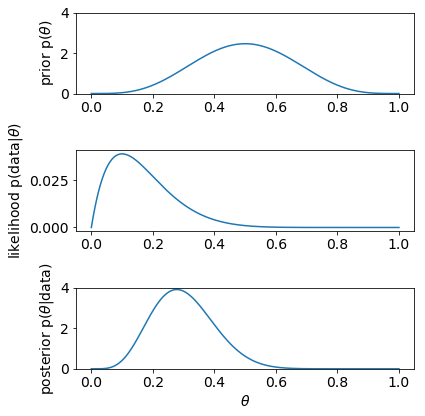

In [24]:
'''calculate posterior from prior with data; not only mean, but also distribution'''

'''Maximum Likelihood Estimator
   inputs xs: x-values                    (numpy ndarray)
          ps: corresponding probabilities (numpy ndarray)
   output MLE: x to max(p)                (float)         '''
a = 5                                           # Prior 
b = 5
N = 10                                          # Data
z = 1
thetas = np.linspace(0., 1., 1001)              # possible distribution of theta
prior = stats.beta(a, b).pdf(thetas)            # 5+ 5=10
likelihood = BernoulliLikelihood(thetas, N, z)  # p(D|N,z)
posterior = stats.beta(a+z, b+N-z).pdf(thetas)  # theoretical posterior, 6+14=20
f = plt.figure(figsize=(6, 6))                  # big figure, space to hold 3 subfigures
f.add_subplot(3, 1, 1)                          # 1st subfigure: top of 3
plt.plot(thetas, prior)                         # prior distribution of theta  
plt.ylim(0, 4.)                                 # same height as later for comparison
plt.ylabel(r'prior p($\theta$)')
f.add_subplot(3, 1, 2)                          # 2nd subfigure: middle of 3
plt.plot(thetas, likelihood)                    # likelihood of theta for data obtained
plt.ylabel(r'likelihood p(data|$\theta$)')
f.add_subplot(3, 1, 3)                          # 3rd subfigure: lowest of 3
plt.ylim(0, 4.)                                 # same as top subfigure 
plt.plot(thetas, posterior)                     # posterior distribution of theta
plt.ylabel(r'posterior p($\theta$|data)')
plt.xlabel(r'$\theta$')
# print means of prior and posterior and MLE for theta from data
# Highest Density Interval: contains 95% of probabilities inside
print('prior      mean = {:.4f}'.format(stats.beta(a, b).mean()))
# theta of max probab.
print('data  theta-MLE = {:.4f}'.format(thetas[np.argmax(likelihood)]))
print('posterior  mean = {:.4f}'.format(stats.beta(a+z, b+N-z).mean()))
plt.tight_layout();

## Koordinatentransformation
    
#### Treffer / Gesamtanzahl

z als Anzahl von N:
$$a=z+1 \qquad b=N-z+1$$
z' als Anteil von N:
$$a=Nz'+1 \qquad b=N(1-z')+1$$

#### Verhältnis / Standardabweichung

mit der Standardabweichung (sinnvoll für $s>0.289$ bzw. $a, b \geq 1$)
$$a=\mu(\frac{\mu(1-\mu)}{s^2}-1)$$ $$b=(1-\mu)(\frac{\mu(1-\mu)}{s^2}-1)$$

## Vorwissen im *Prior*

#### 1) Kein Vorwissen
Keine Vorversuche $N=0$ und $z=0$: $\;p(\theta|a,b) = \text{beta}(\theta|a,b) = \theta^{\,a-1} (1-\theta)^{b-1} / B(a,b)$
- $a=1,\;b=1$
- flache Wahrscheinlichkeitsverteilung $p(\theta)=1$
- Versuchsergebnis (Daten) bestimmen alleine den Posterior

#### 2) starkes Vorwissen
Münze ist neu, direkt aus der Prägeanstalt. 
- $\theta=0,5$
- als ob bereits 100 mal geworfen: $a=51,\;b=51$

#### 3) schwaches Vorwissen
Münze ist zweifelhaft
- $\theta=0,75$
- breite Verteilung: $a=3,\;b=7$  (2 von 8)

In [1]:
'''different priors => different posterior'''
fig = plt.figure(figsize=(9,6))
thetas = np.linspace(0., 1., 101)
fig.add_subplot(3, 3, 1)
plt.ylabel(r'prior p($\theta$)')
plt.title('1) uninformative prior') 
# prior 1) uniform
plt.plot(thetas, stats.beta(1, 1).pdf(thetas), 'c-')
plt.ylim(0, 9)
fig.add_subplot(3, 3, 2)
plt.title('2) strong prior')
# prior 2) strong 50:50
plt.plot(thetas, stats.beta(51, 51).pdf(thetas), 'r-')
plt.ylim(0, 9)
fig.add_subplot(3, 3, 3)
plt.title('3) weak prior')
# prior 3) weak 75% 6 of 8
plt.plot(thetas, stats.beta(7, 3).pdf(thetas), 'y-')
plt.ylim(0, 9)
# likelihood for theta under data 17 of 20
likelih = BernoulliLikelihood(thetas, 20, 17)
for i in range(3):
    fig.add_subplot(3, 3, 3+i+1)
    plt.plot(thetas, likelih) # likelihood of data equal for all
    if i>0:
        plt.gca().axes.get_yaxis().set_ticklabels([])
    else:
        plt.ylabel(r'p(D|$\theta$)')

fig.add_subplot(3, 3, 7)
plt.plot(thetas, stats.beta(18, 4).pdf(thetas), 'c-') # posterior 1)
plt.ylim(0, 9)
plt.xlabel(r'$\theta$')
plt.ylabel(r'posterior p($\theta$)')
fig.add_subplot(3, 3, 8)
plt.plot(thetas, stats.beta(68, 54).pdf(thetas), 'r-')# posterior 2)
plt.ylim(0, 9)
plt.xlabel(r'$\theta$')
fig.add_subplot(3, 3, 9)
plt.plot(thetas, stats.beta(24, 6).pdf(thetas), 'y-') # posterior 3)
plt.plot(thetas, stats.beta(18, 4).pdf(thetas),'c--') # compare w posterior 1) 
plt.ylim(0, 9)
plt.xlabel(r'$\theta$')
plt.tight_layout();

NameError: name 'plt' is not defined

### bisher:

- geschlossen lösbar
- Lösung sofort zugänglich
- reichhaltige Auswahl an Priors

#### Prior mono-modal / bi-modal

- Es gibt nur einen zentralen Peak
- oder zwei fest am Rand an $0$ und $1$

# Grenzen der Methode

### Gegenbeispiel

Münzen aus dem Laden in der Spiegelgasse: 

- 2 Varianten 
    - entweder Kopf zu 25%
    - oder Zahl zu 25%


In [29]:
'''calculate posterior the hard way: for each theta run the whole Bayes'''
# Prerequisites
N = 27            # experiment: 27 tosses
z = 14            # data: number of head in experiment
nn = 1000         # 100 already calculates for 5 sec
thetas = np.linspace(0., 1., nn+1)# enough dense possible thetas
p0 = .02          # low probability overall (will stay on zero else)

# Prior with two triangle-shaped peaks around 25% and 75%
myprior = np.zeros_like(thetas)+p0 # start with low probability overall
l = len(thetas)-1 # for relative location of peaks
ll = l//20+1
myprior[l//5   :l//4+1]    = p0+np.linspace(0, 1, ll)  # rising edge 1st peak
myprior[l//4   :3*l//10+1] = p0+np.linspace(1, 0, ll)  # falling
myprior[7*l//10:3*l//4+1]  = p0+np.linspace(0, 1, ll)  # rising edge 2nd peak
myprior[3*l//4 :4*l//5+1]  = p0+np.linspace(1, 0, ll)  # falling
myprior /= myprior.sum()                               # normalize

'''likelihood for t=theta under data from above: z obtained heads among N tosses'''
# likelihood for theta under data
mylikelihood = BernoulliLikelihood(thetas, N, z)

'''evidence sums up all the likelihoods (z,N) 
   over all possible parameters (ts) with priors (ps)'''
def evidence(lh, pr):
    return np.asarray(lh*pr).sum()

# Posterior
myposterior = mylikelihood * myprior / evidence(mylikelihood, myprior)

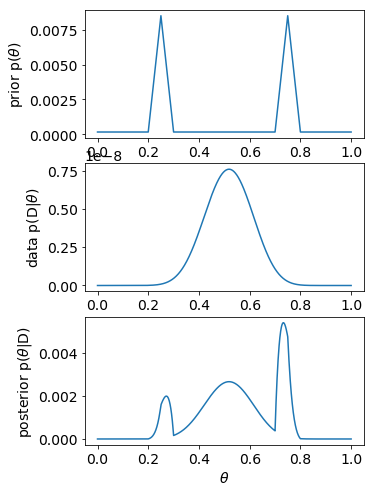

In [30]:
'''prior out of canon => posterior ?'''
fig = plt.figure(figsize=(5, 8))
fig.add_subplot(3, 1, 1)
plt.plot(thetas, myprior)
plt.ylabel(r'prior p($\theta$)')
fig.add_subplot(3, 1, 2)
plt.plot(thetas, mylikelihood)
plt.ylabel(r'data p(D|$\theta$)')
fig.add_subplot(3, 1, 3)
plt.plot(thetas, myposterior)
plt.ylabel(r'posterior p($\theta$|D)')
plt.xlabel(r'$\theta$');

es ist nicht bei $\theta$ function losbar.

### Posterior

- mehr Wahrscheinlichkeit Richtung 75%

#### Aber unrealistisch

- 50% häufiger als 25%?
- Tal bei 30% und 70%
- entspricht nicht dem Modell

# Zusammenfassung

- Parmeter wird Wahrscheinlichkeit zugeordnet ("Wissen über Parameter") $p(\theta)$
- Bayes Regel

$$p(\theta\,|\,D) = \frac{p(D\,|\,\theta)\,p(\theta)}{p(D)}$$

- Bayes Schlußfolgerung für Modell
    - ausgehend vom Vorwissen über Modell-Parameter **Prior**
    - Einbeziehen Daten aus Versuch: 
        - deren Wahrscheinlichkeit unter dem Parameter: **Likelihood**
    - Neueinschätzung der Modell-Parameter **Posterior**

- *konjugierte Priors* erlauben 
    - geschlossene Formel
    - exakte Berechnung
    - Einbeziehung der Daten (Anzahl)
    - unabhängig von Datenerfassung (Reihenfolge)
    - Interpretation des Priors als Vorversuche

- *konjugiert Priors* lassen nicht jedes Modell zu
    - für komplexe Modelle ungeeignet

# Alternativen
- Anderes Beispiel für konjugierte Priors:
    - Gauß-Verteilungen

# Ausblick
- Weg von mathematisch exakter Möglichkeit
    - (zu starke Einschränkung in der Modell-Auswahl)
- Hin zu zufallsbasierten Methoden 

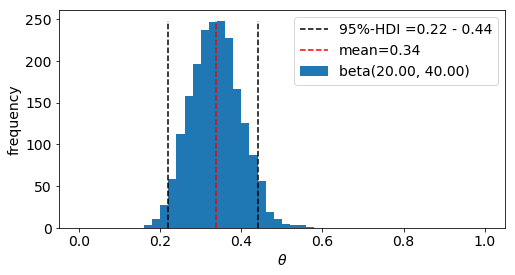

In [32]:
'''draw sample of (theoretical) posterior distribution
   calculate Mean and HDI and show result'''

# Fragen?